In [80]:
# import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [81]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [82]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [83]:
# search table names
sherlock = inspect(engine)
sherlock.get_table_names()

# look for col titles in tables
col_measurement = sherlock.get_columns('measurement')

# show name and type of measurement 
for c in col_measurement:
    print(c['name'], c["type"])
    
col_station = sherlock.get_columns('station')

for c in col_station:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [84]:
# use df in new model and show in new model
Base = automap_base()

# show tables
Base.prepare(engine, reflect=True)

In [85]:
# show all he classes that have been found
Base.classes.keys()

['measurement', 'station']

In [86]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

('2017-08-23', 0.0)


Text(0, 0.5, 'Inches')

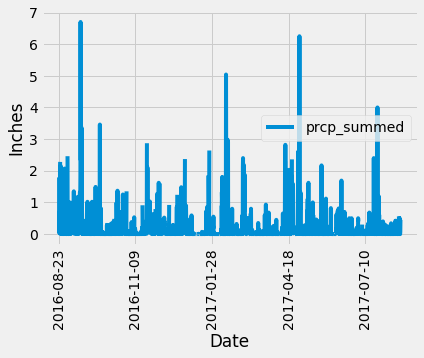

In [87]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
#--Calculate most recent datapoint
for last in session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).limit(1):
    print(last)

# Perform a query to retrieve the data and precipitation from Measurement table
# Filter by 1 year from most recent datapoint

twelve_rain = session.query(Measurement.date, Measurement.prcp)\
                        .filter(Measurement.date >= "2016-08-23")

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

df = pd.DataFrame(twelve_rain, columns =['date', 'prcp_summed'])\
     .sort_values(['date'], ascending=True)
df.set_index('date', inplace=True)

# plot it up w/ matplotlib
df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [88]:
stations = session.query(Station.id).all()
stations_open = len(stations)
stations_open

9

In [89]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#Query for all station codes and station names
st_name = session.query(Station.station, Station.name).all()

#Put station codes and names into a dataframe
st_names_df = pd.DataFrame(st_name, columns =['station', 'station_name'])

#Query measurement for station codes and then number of times station codes come up across all
#measurement values, then groupby station code
st_count_data = session.query(Measurement.station, func.count(Measurement.station))\
                        .group_by(Measurement.station).all()

#Put station codes and their counts into a dataframe
station_count_df = pd.DataFrame(st_count_data, columns =['station', 'station_frequency'])

#Join the dataframes
most_active_stations= pd.merge(station_count_df, station_names_df, on=['station'])
most_active_stations.sort_values(by=['station_frequency'], ascending=False)

,station,station_frequency,station_name
6,USC00519281,2772,"WAIHEE 837.5, HI US"
7,USC00519397,2724,"WAIKIKI 717.2, HI US"
1,USC00513117,2709,"KANEOHE 838.1, HI US"
8,USC00519523,2669,"WAIMANALO EXPERIMENTAL FARM, HI US"
3,USC00516128,2612,"MANOA LYON ARBO 785.2, HI US"
2,USC00514830,2202,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
0,USC00511918,1979,"HONOLULU OBSERVATORY 702.2, HI US"
4,USC00517948,1372,"PEARL CITY, HI US"
5,USC00518838,511,"UPPER WAHIAWA 874.3, HI US"


In [90]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#--Query for station codes, min, max, avg measurements for just USC00519281
temp_df = session.query(Measurement.station, func.min(Measurement.tobs),\
                            func.max(Measurement.tobs), func.avg(Measurement.tobs))\
                            .filter(Measurement.station == "USC00519281")

#--Put into dataframe
station_count = pd.DataFrame(temp_df, columns =['station', 'lowest_temp', 'highest_temp',\
                                                          'avg_temp'])

# set index and show statioon count
station_count.set_index('station', inplace=True)
station_count

,lowest_temp,highest_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


Text(0, 0.5, 'Frequency')

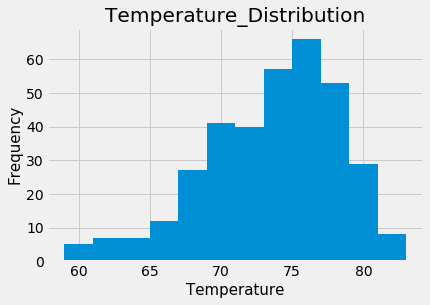

In [91]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#--Query for last 12 months at the most active station
twelve_plot = session.query(Measurement.date, Measurement.tobs)\
                            .filter(Measurement.station == "USC00519281")\
                            .filter(Measurement.date >= "2016-08-23")

# create sepearte DF
station_count = pd.DataFrame(twelve_plot, columns =['date', 'Temperature_Distribution'])

# plot histogram 
hist = station_count.hist(bins=12)
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Frequency",fontsize=15)